In [1]:
#1.Data Exploration

In [28]:
#a. Load the dataset and perform exploratory data analysis (EDA).
import pandas as pd
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
#b. Examine the features, their types, and summary statistics.
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [31]:
# b. Encode categorical variables.
df['output_mapping']=df['Outcome'].map({0:"Negative",1:"Positive"})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,output_mapping
0,6,148,72,35,0,33.6,0.627,50,1,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,0,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Negative
764,2,122,70,27,0,36.8,0.340,27,0,Negative
765,5,121,72,23,112,26.2,0.245,30,0,Negative
766,1,126,60,0,0,30.1,0.349,47,1,Positive


In [32]:
%pip install seaborn

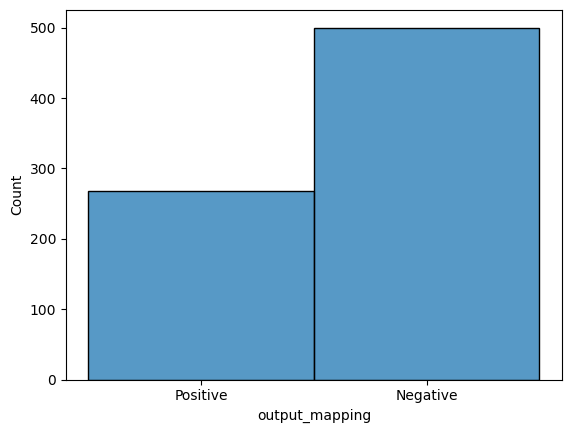

In [33]:
# c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['output_mapping'])
plt.show()

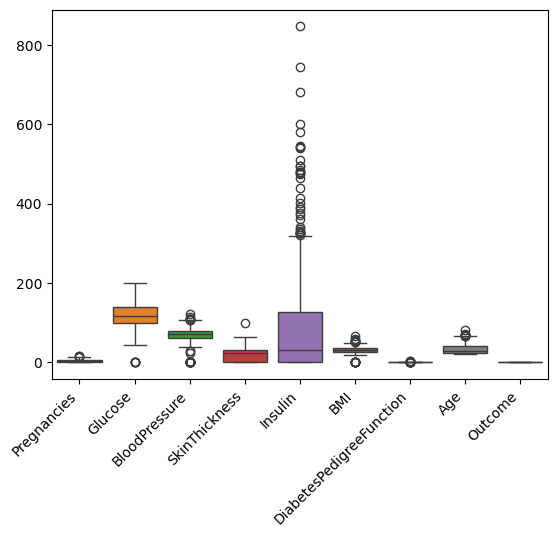

In [34]:
sns.boxplot(df)
plt.xticks(rotation=45, ha='right')
plt.show()

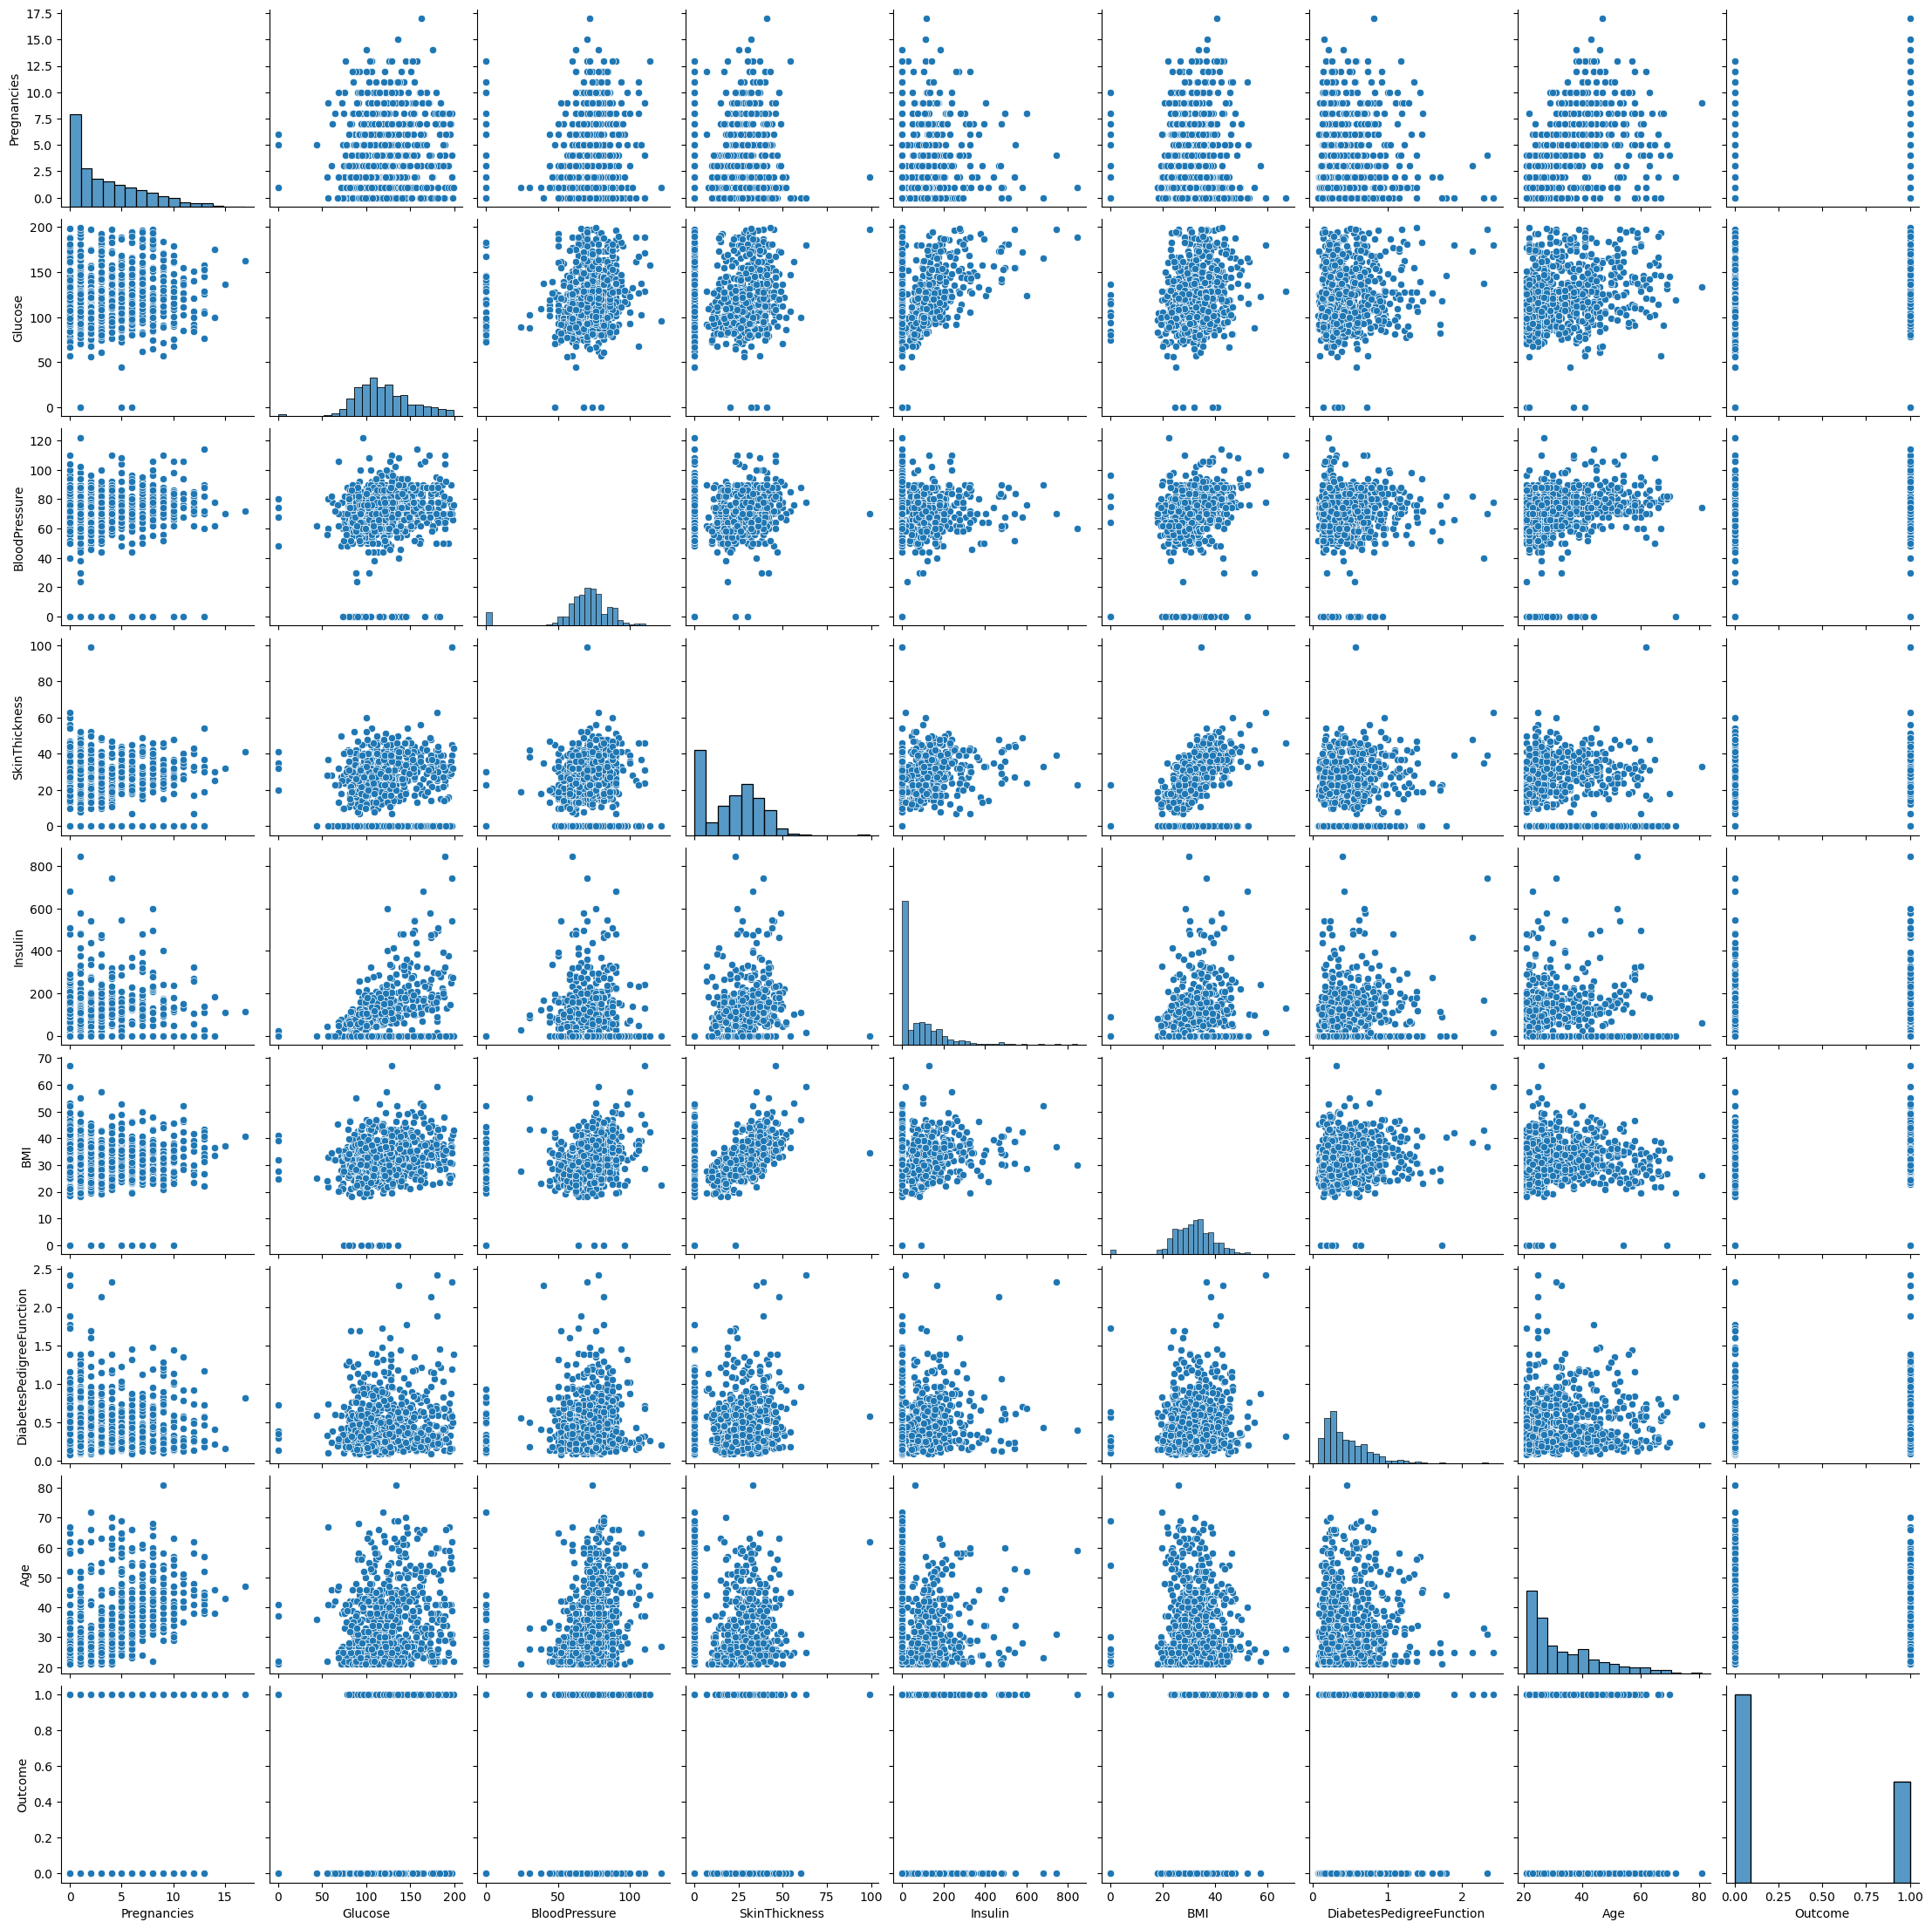

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
#a. Handle missing values (e.g., imputation).
df.isnull().sum() # No missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
output_mapping              0
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(0)

In [53]:
#3. Model Building:
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
#b. Train the model using the training data.


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df['Outcome_encoded']=df['output_mapping'].map({'Negative':0,'Positive':1})
X=df.drop(columns=['Outcome','output_mapping'])
Y=df['Outcome_encoded']



X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=56)

model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
m=model.intercept_
c=model.coef_
print("Coefficient",c)
print("Intercept",m)


Coefficient [[ 6.22814695e-02  1.66868293e-02 -7.27674413e-03  3.28024432e-03
  -6.54522368e-04  4.20834104e-02  2.22968780e-01  1.07775152e-02
   7.00239220e+00]]
Intercept [-7.48267693]


In [51]:
#4. Model Evaluation:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
#Visualize the ROC curve.

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

conf=confusion_matrix(Y_test,Y_pred)
acc=accuracy_score(Y_test,Y_pred)
classi=classification_report(Y_test,Y_pred)
print("Confusion Matrix",conf)
print("Accuracy",acc)
print("Classification_Report",classi)

Confusion Matrix [[114   0]
 [  0  40]]
Accuracy 1.0
Classification_Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        40

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



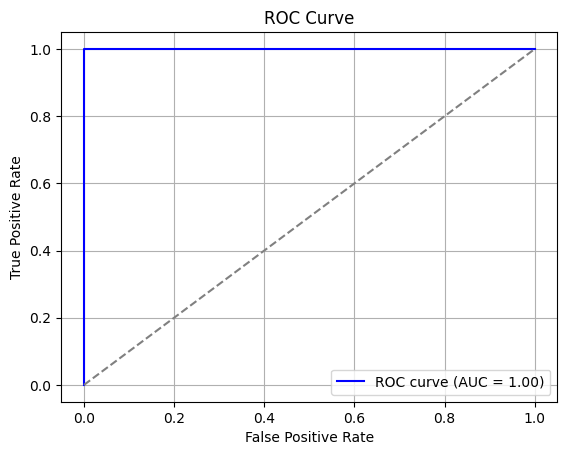

In [56]:
# Visualize the ROC curve.
from sklearn.metrics import auc,roc_curve
import matplotlib.pyplot as plt
y_prod=model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prod)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [61]:
#5. Interpretation:
#a. Interpret the coefficients of the logistic regression model
c=model.coef_
print(c)

[[ 6.22814695e-02  1.66868293e-02 -7.27674413e-03  3.28024432e-03
  -6.54522368e-04  4.20834104e-02  2.22968780e-01  1.07775152e-02
   7.00239220e+00]]


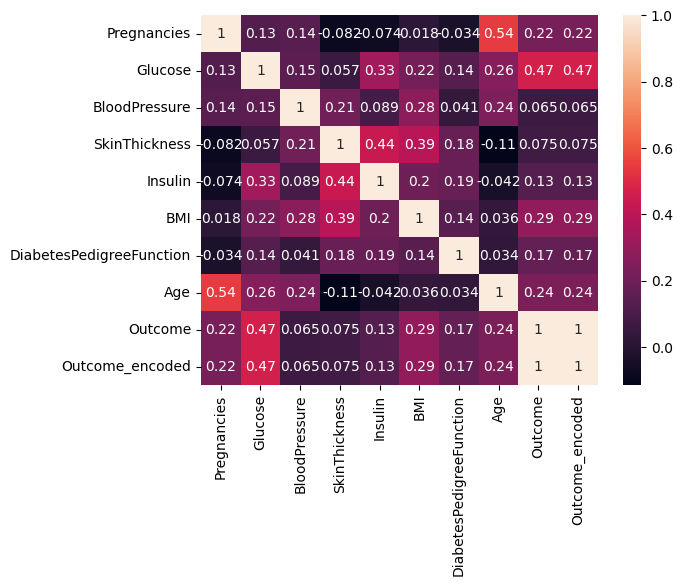

In [58]:
#b. Discuss the significance of features in predicting the target variable (survival probability in this case).
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

In [ ]:
Interview Question::
1. What is the difference between precision and recall?
Both Precision and Recall are evaluation metrics for logisticregression.
Precision deals with that how many predicted positives are acutually correct.Higher the Precision fewer is the False Positives
Formula :: True Positive/False Positive+True Positive
Recall deals with that How many acutually predicted positives were identified correctly.Higher the Recall fewer is the False Negatives
Formula :: True Positive/True Positive+False Negative

2. What is cross-validation, and why is it important in binary classification?
Cross-validation involves splitting your dataset into multiple parts (called folds), training the model on some parts, and 
testing it on the remaining parts — repeatedly.it is important for 1. Reduces Overfitting 2. Provides Reliable Performance Estimates
3. Handles Class Imbalance Better 4. Helps in Model Selection and Tuning